In [12]:
import pandas as pd

In [13]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
% matplotlib inline
plt.style.use('ggplot')

In [14]:
df = pd.DataFrame()
for i in range(5):
  df['Banner_type_' +str(i)] = np.random.randint(0,2,100000)

In [15]:
df.head()

,Banner_type_0,Banner_type_1,Banner_type_2,Banner_type_3,Banner_type_4
0,0,0,1,0,0
1,1,1,1,1,0
2,0,1,1,0,1
3,0,0,1,0,1
4,1,1,0,0,1


In [16]:
num_iterations = 100000
num_banners = 5
count = np.zeros(num_banners)

Q= np.zeros(num_banners)
banner_selected= []

In [17]:
def epsilon_greedy_policy(epsilon):
  if np.random.uniform(0,1) < epsilon:
    return np.random.choice(num_banners)
  else:
    return np.argmax(Q)

In [18]:
sum_rewards =np.zeros(num_banners)

In [19]:
for i in range(num_iterations):
  banner = epsilon_greedy_policy(0.5)
  reward = df.values[i,banner]
  count[banner] += 1
  sum_rewards[banner] += reward
  Q[banner]= sum_rewards[banner]/count[banner]
  banner_selected.append(banner)

In [20]:
print('The best banner is banner {}'. format(np.argmax(Q)))

The best banner is banner 4


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


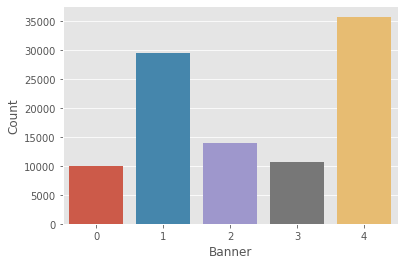

In [21]:
ax = sns.countplot(banner_selected)
ax.set(xlabel='Banner', ylabel='Count')
plt.show()